# 데이터프레임 조회

In [ ]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

# 1. 데이터프레임 조회

##### 1) 데이터 읽어오기

In [ ]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/tips.csv'
tip = pd.read_csv(path)

# 확인
tip.head()

##### 2) 특정 열 조회
- **df.loc[:,[열1, 열2...]]** 형태로 조회할 열 이름을 리스트로 지정
- 열 부분은 생략 가능, 행 부분은 생략 X

In [ ]:
# tip.loc[ 행,  열]

# total_bill 열 조회 1
tip.loc[:, 'total_bill']     # 시리즈 형태 : 특정 열만 뺴온 것

tip.loc[:, ['total_bill']]   # []처리를 함으로써 데이터프레임 형태

# total_bill 열 조회 2
tip['total_bill']    

# tip.loc[:, 'total_bill']  = tip['total_bill']
# : 을 생각하고 앞에 .loc 도 함께 생략해야한다.


In [ ]:
# total_bill, tip 열 동시에 조회
tip.loc[:, ['total_bill', 'tip']]

In [ ]:
#####    연습     ####
# tip데이터프레임에서 tip, day, time열만 조회. tip기준으로 오름차순
tip.loc[:, ['tip', 'day', 'time']].sort_values(by='tip', ascending=True)

# = tip[['tip', 'day', 'time']].sort_values(by='tip', ascending=True)

##### 3) 열 범위 조회
- 범위 조회는 **df.loc[:, 열 이름1:열 이름2]** 형태로 조회합니다.
- 범위는 하나만 지정할 수 있어 리스트가 될 수 없으니 대괄호를 사용하지 않습니다.
- 범위 마지막 열도 조회 대상에 포함됨니다.

In [ ]:
# sex열 ~ time열 조회
# tip.loc[행, 열]

tip.loc[:, 'sex':'time']

##### 4) 조건으로 조회

In [ ]:
# tip 열 값이 6.0 보다 큰 행 조회 1
tip.loc[tip['tip'] > 6.0, :]

In [ ]:
# tip 열 값이 6.0 보다 큰 행 조회 2 (변수선언)
c = tip['tip'] > 6.0
tip.loc[c]

In [ ]:
# 여러 조건 주기  and(&)
c = tip['tip'] > 6.0
b = tip['day'] == 'Sat'
tip.loc[c & b]

In [ ]:
# 여러 조건 주기  or(|)
c = tip['tip'] > 6.0
b = tip['day'] == 'Sat'
tip.loc[c | b]

##### 5) isin(), between()
- **isin([값1, 값2,..., 값n])**: 값1 또는 값2 또는...값n인 데이터만 조회합니다.

In [ ]:
# 값 나열(day가 sat 또는 sun) , or의 의미
tip.loc[tip['day'].isin(['Sat','Sun'])]

# = tip.loc[(tip['day'] == 'Sat') | (tip['day'] == 'Sun')] 


- **between(값1, 값2)**: 값1 ~ 값2까지 범위안의 데이터만 조회합니다.

In [ ]:
# 범위 지정 ( 1 <= size <= 3)  , and의 의미
tip.loc[tip['size'].between(1, 3)]

# = tip.loc[(tip['size'] >= 1) & (tip['size'] <= 3)]

##### 6) 조건을 만족하는 행의 일부 열 조회
- **df.loc[조건, ['열 이름1', '열 이름2',...]]** 형태로 조회할 열을 리스트로 지정합니다.

In [ ]:
# 조건에 맞는 하나의 열 조회
# size가 5이상인 tip열 조회
tip.loc[tip['size']>=5, ['tip']]


# size가 5이상인 total_bill, tip, size열 조회
tip.loc[tip['size'] >= 5, ['total_bill', 'tip', 'size']]

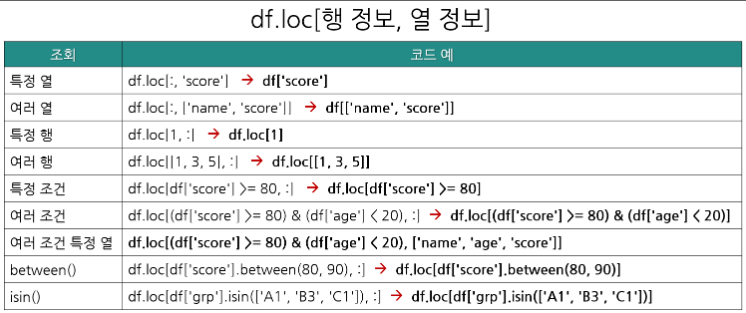

##### 7) 인덱스 초기화
- 다음과 같은 경우 인덱스 초기화가 필요합니다.
    - 기존 데이터프레임에서 일부 행을 가져와 새로 만든 데이터프레임
    - 일부 행이 지워진 데이터프레임
- 특히 0부터 시작하는 정수형 인덱스의 경우 초기화를 하는 것이 좋습니다.
- 깔끔한 데이터가 사용하기 좋은 데이터입니다.


- 다음과 같은 경우 인덱스 초기화가 필요합니다.
    - 기존 데이터프레임에서 일부 행을 가져와 새로 만든 데이터프레임
    - 일부 행이 지워진 데이터프레임
- 특히 0부터 시작하는 정수형 인덱스의 경우 초기화를 하는 것이 좋습니다.
- 깔끔한 데이터가 사용하기 좋은 데이터입니다.

In [ ]:
# 인덱스 초기화
tip.reset_index(drop=True, inplace=True)